In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đường dẫn đến mô hình
model_path = '/content/drive/My Drive/cnn_model.h5'

In [ ]:
def load_or_train_model():
    try:
        model = tf.keras.models.load_model(model_path)
    except (FileNotFoundError, OSError):
        mnist = fetch_openml('mnist_784', version=1)
        X, y = mnist.data, mnist.target.astype(int)
        X = X.values.reshape(-1, 28, 28, 1)
        X = X / 255.0
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
        model.save(model_path)
    return model

In [ ]:
def load_and_predict_image(image_path):
    # Đọc ảnh bằng OpenCV và chuyển đổi sang ảnh xám
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Thay đổi kích thước ảnh xuống 28x28 pixels
    resized_image = cv2.resize(image, (28, 28))

    # Chuẩn hóa ảnh
    image_array = resized_image.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Dự đoán
    prediction = np.argmax(model.predict(image_array), axis=1)[0]

    # Hiển thị ảnh và kết quả
    plt.imshow(resized_image, cmap="gray")
    plt.title(f"Dự đoán: {prediction}")
    plt.axis("off")
    plt.show()
    print(f"Dự đoán: Chữ số là {prediction}")


In [ ]:
# Tải hoặc huấn luyện mô hình
model = load_or_train_model()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


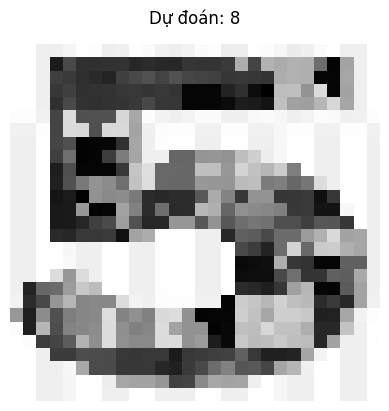

Dự đoán: Chữ số là 8


In [ ]:
# Nhập đường dẫn ảnh từ người dùng
image_path = '/content/drive/My Drive/AI/so5.png'
load_and_predict_image(image_path)